# Second step

First we have to recover circuits from the previous step. The first code cell contains the uncut circuit.

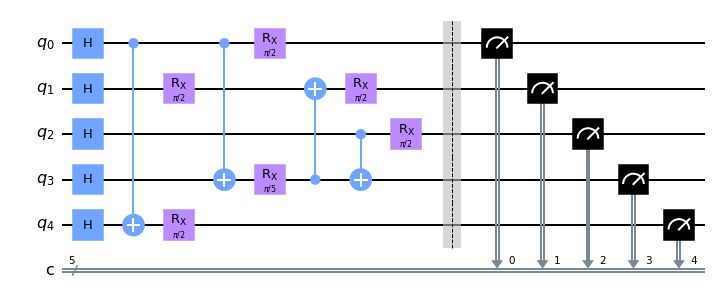

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.opflow import I, X, Y, Z
plt.rcParams.update({'font.size': 16}) # enlarge fonts


# Import standard qiskit modules 

from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, assemble
from qiskit.quantum_info.operators import Operator, Pauli


#For doing exact simulation you can use Statevector (feel free to use something else)
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
circuit = QuantumCircuit(5,5)

circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)
circuit.h(4)

circuit.cx(0,4)
circuit.rx(np.pi/2,1)
circuit.rx(np.pi/2,4)

circuit.cx(0,3)

circuit.rx(np.pi/2,0)

circuit.rx(np.pi/5,3)

circuit.cx(3,1)

circuit.rx(np.pi/2,1)

circuit.cx(2,3)

circuit.rx(np.pi/2,2)

circuit.measure_all(True, False)

circuit.draw(output='mpl')

For each cut, there are 4 expected values computed for the first part of the circuit (for the identity and the Pauli matrices) and the second part of the circuit is simulated 8 times, twice for each of the previous matrices. The reason why it is computed twice is because each two dimensional matrices has two eigenvectors. We can observe that, with each cut, the number of comibations scale quickly. More exactly, the number of measurements scale exponentially with the number of cuts.

When the initial circuit was cut, we observed that Z and I are written using the same basis, therefore, only one of its expected value needs to be measured. The same reasoning applies for its eigenstates. The number of states need to be prepared can also be reduced using the fact that the eigenstates of the Pauli matrices can be written as a linear combination of the Z basis. Therefore, knowing how the circuits transforms this basis, we can calculate the expected values for Y and Z.

This is applied in the following cells:

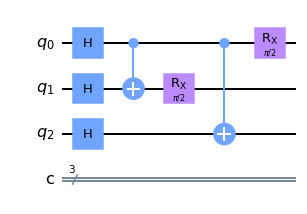

In [2]:
cut_circuit_1 = QuantumCircuit(3,3)

cut_circuit_1.h(0)
cut_circuit_1.h(1)
cut_circuit_1.h(2)

cut_circuit_1.cx(0,1)

cut_circuit_1.rx(np.pi/2,1)
cut_circuit_1.cx(0,2)


cut_circuit_1.rx(np.pi/2,0)



cut_circuit_1.draw(output='mpl')

In [4]:
initial_state_cut1 = Statevector.from_label('000')

final_state_cut1 = initial_state_cut1.evolve(cut_circuit_1)

operators = [I^X^X, X^X^X, Y^X^X, Z^X^X]

expectedvalues_cut1 = []

for operator in operators:
    expectedvalues_cut1.append(final_state_cut1.expectation_value(operator))
    expectedvalues_cut1.append(final_state_cut1.expectation_value(operator))
print(expectedvalues_cut1)

[(0.9999999999999998+0j), (0.9999999999999998+0j), (0.9999999999999998+0j), (0.9999999999999998+0j), 2.2371143170757382e-17j, 2.2371143170757382e-17j, (-2.2371143170757382e-17+0j), (-2.2371143170757382e-17+0j)]


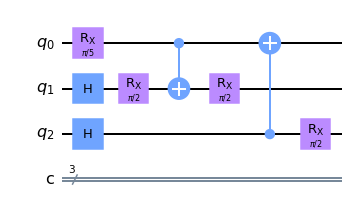

In [44]:
cut_circuit_2 = QuantumCircuit(3,3)

cut_circuit_2.h(1)
cut_circuit_2.h(2)

cut_circuit_2.rx(np.pi/5,0)

cut_circuit_2.rx(np.pi/2, 1)

cut_circuit_2.cx(0,1)
cut_circuit_2.rx(np.pi/2,1)
cut_circuit_2.cx(2,0)


cut_circuit_2.rx(np.pi/2,2)

cut_circuit_2.draw(output='mpl')

In order to find a smaller set of measures needed to have the statistic of the whole system, the eigenvectors of the Pauli matrices must be written as a linear combination of the Z basis. Therefore, we are able to write the expected value as a bra-Pauli tensor-ket product.

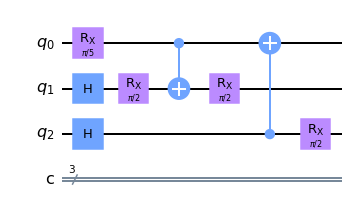

In [45]:
cut_circuit_2 = QuantumCircuit(3,3)

cut_circuit_2.h(1)
cut_circuit_2.h(2)

cut_circuit_2.rx(np.pi/5,0)

cut_circuit_2.rx(np.pi/2, 1)

cut_circuit_2.cx(0,1)
cut_circuit_2.rx(np.pi/2,1)
cut_circuit_2.cx(2,0)


cut_circuit_2.rx(np.pi/2,2)

cut_circuit_2.draw(output='mpl')

In order to find a smaller set of measures needed to have the statistic of the whole system, the eigenvectors of the Pauli matrices must be written as a linear combination of the Z basis. Therefore, we are able to write the expected value as a bra-Pauli tensor-ket product. Since both bra and ket can be written as a linear combination on 0 and 1 ket, only the action of the circuit onto those vectors will be needed to find all the values. The Pauli tensor for the X matrix acts only as an "inversor" of the coefficients of each vector, since it swaps the 0 by the 1 and viceversa. That is the reason why the function reverse_qargs is called in the code. From there, only the inner product has to be computed having in mind all the normalization constants.

In [46]:
initial_state_cut2_0 = Statevector.from_label('000')
final_state_cut2_0 = initial_state_cut2_0.evolve(cut_circuit_2)


initial_state_cut2_1 = Statevector.from_label('001')
final_state_cut2_1 = initial_state_cut2_1.evolve(cut_circuit_2) 

expectedvalues = []

expectedvalues.append(final_state_cut2_0.expectation_value(X^X^X))
expectedvalues.append(final_state_cut2_1.expectation_value(X^X^X))

expectedvalues.append(1/2*(final_state_cut2_0.expectation_value(X^X^X)+final_state_cut2_1.expectation_value(X^X^X))+1/2*(final_state_cut2_0.inner(final_state_cut2_1.reverse_qargs())+final_state_cut2_0.inner(final_state_cut2_1.reverse_qargs())))
expectedvalues.append(1/2*(final_state_cut2_0.expectation_value(X^X^X)+final_state_cut2_1.expectation_value(X^X^X))-1/2*(final_state_cut2_0.inner(final_state_cut2_1.reverse_qargs())+final_state_cut2_0.inner(final_state_cut2_1.reverse_qargs())))
expectedvalues.append(1/2*(final_state_cut2_0.expectation_value(X^X^X)+final_state_cut2_1.expectation_value(X^X^X))+1.0j/2*(final_state_cut2_0.inner(final_state_cut2_1.reverse_qargs())-final_state_cut2_0.inner(final_state_cut2_1.reverse_qargs())))
expectedvalues.append(1/2*(final_state_cut2_0.expectation_value(X^X^X)+final_state_cut2_1.expectation_value(X^X^X))+1.0j/2*(-final_state_cut2_0.inner(final_state_cut2_1.reverse_qargs())+final_state_cut2_0.inner(final_state_cut2_1.reverse_qargs())))

expectedvalues.append(final_state_cut2_0.expectation_value(X^X^X))
expectedvalues.append(final_state_cut2_1.expectation_value(X^X^X))

print(expectedvalues)

[(0.9999999999999999+0j), (0.9999999999999999+0j), (0.9999999999999999+0j), (0.9999999999999999+0j), (0.9999999999999999+0j), (0.9999999999999999+0j), (0.9999999999999999+0j), (0.9999999999999999+0j)]
